In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval
import cv2
from sklearn.utils import shuffle
training_set = './../train_simplified/'
from os import listdir
from os.path import isfile, join
train_files = [join(training_set, f) for f in listdir(training_set) if isfile(join(training_set, f))]

In [2]:
def clean_drawing(inkarray):
    inkarray = literal_eval(inkarray)
    stroke_lengths = [len(stroke[0]) for stroke in inkarray]
    total_points = sum(stroke_lengths)
    np_ink = np.zeros((total_points, 3), dtype=np.float32)
    current_t = 0
    for stroke in inkarray:
        for i in [0, 1]:
            np_ink[current_t:(current_t + len(stroke[0])), i] = stroke[i]
        current_t += len(stroke[0])
        np_ink[current_t - 1, 2] = 1  # stroke_end
    # Preprocessing.
    # 1. Size normalization.
    lower = np.min(np_ink[:, 0:2], axis=0)
    upper = np.max(np_ink[:, 0:2], axis=0)
    scale = upper - lower
    scale[scale == 0] = 1
    np_ink[:, 0:2] = (np_ink[:, 0:2] - lower) / scale
    # 2. Compute deltas.
    np_ink = np_ink[1:, 0:2] - np_ink[0:-1, 0:2]
    return np_ink

def load_and_clean(files):
    dfs = []
    for file in files:
        df = pd.read_csv(file)
        dfs += [df]
    full_df = pd.concat(dfs)
    full_df['drawing'] = full_df['drawing'].apply(literal_eval)
    return full_df

In [3]:
df = load_and_clean(train_files[:1])
# randomly shuffle the rows

In [4]:
df.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,MD,"[[[41, 41, 49, 41, 42], [76, 110, 157, 201, 25...",5042528606748672,True,2017-03-11 21:58:33.282340,lollipop
1,FI,"[[[61, 65, 67], [98, 106, 255]], [[72, 66, 56,...",5232288554024960,True,2017-01-25 14:49:39.148020,lollipop
2,US,"[[[43, 47, 61, 87, 105, 122, 127, 127, 121, 11...",5645918164484096,True,2017-01-23 20:06:05.529950,lollipop
3,TW,"[[[94, 92, 87, 87, 30, 19, 4, 0, 0, 12, 31, 68...",5447851465244672,True,2017-03-23 11:50:04.544400,lollipop
4,HK,"[[[82, 70, 58, 59, 76, 89, 98, 107, 112, 112, ...",5361063753154560,True,2017-01-24 18:08:47.251220,lollipop


In [10]:
BASE_SIZE = 256
size = 80

In [26]:
import matplotlib.pyplot as plt
def draw_cv2(raw_strokes, size=256, lw=6):
    fig = plt.figure()
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for stroke in raw_strokes:
        for i in range(len(stroke[0]) - 1):
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]), (stroke[0][i + 1], stroke[1][i + 1]), 255, lw)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        plt.imshow(img,cmap='gray')
        plt.show()
        fig.savefig('test.jpg')

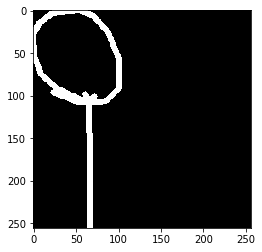

In [27]:
draw_cv2(df['drawing'].iloc[1])

In [13]:
print("{0} kills {1}".format(1,3))

1 kills 3
